## **UNSUPERVISED MACHINE LEARNING WORKSHOP I**

Here we are going to implement the math behind dimensionality reduction, and to implement some unsupervised learning algorithms for dimensionality reduction.

### **1. Simulate any random rectangular matrix A**

In [1]:
import numpy as np

mat = np.matrix(np.random.randint(low = 1, high=5, size = (4,4)))
display(mat)

matrix([[1, 1, 3, 2],
        [4, 1, 4, 2],
        [1, 3, 3, 2],
        [2, 2, 3, 3]])

- What is the rank and trace of A?


In [2]:
print(f"The rank of the matrix is {np.linalg.matrix_rank(mat)} and it's the maximum number of rows or columns linearly independent")

The rank of the matrix is 4 and it's the maximum number of rows or columns linearly independent


- What is the determinant of A?

In [3]:
print(f"The determinat of the matrix is {np.linalg.det(mat) :.1f}")

The determinat of the matrix is 20.0


- Can you invert A? How?

We can use np.linalg.inv to math it. If the determinat is different to zero, we can find the inverse matrix

In [4]:
if np.linalg.det(mat) != 0:
    print('The inverse matrix is:')
    display(np.linalg.inv(mat))
else:
    print(f"The inverse of the matrix doesn't exist, det(matrix) must be <> 0")


The inverse matrix is:


matrix([[-5.50000000e-01,  3.00000000e-01, -5.00000000e-02,
          2.00000000e-01],
        [-5.00000000e-01,  3.02788098e-17,  5.00000000e-01,
         -8.07434927e-17],
        [ 6.50000000e-01,  1.00000000e-01,  1.50000000e-01,
         -6.00000000e-01],
        [ 5.00000000e-02, -3.00000000e-01, -4.50000000e-01,
          8.00000000e-01]])

- How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

Eigenvalues

In [5]:
print("eigenvalues of A'A:")
display(np.linalg.eig(np.dot(mat.T, mat))[0])
print("eigenvalues of AA':")
display(np.linalg.eig(np.dot(mat, mat.T))[0])

eigenvalues of A'A:


array([92.85292534,  6.4692265 ,  1.03357498,  0.64427319])

eigenvalues of AA':


array([92.85292534,  6.4692265 ,  1.03357498,  0.64427319])

Note that eigenvalues are the same

Eigenvectors

In [6]:
print("eigenvectors of A'A")
display(np.linalg.eig(np.dot(mat.T, mat))[1])
print("eigenvectors of AA'")
display(np.linalg.eig(np.dot(mat, mat.T))[1])

eigenvectors of A'A


matrix([[ 0.44594549,  0.71164166, -0.41941086,  0.34466404],
        [ 0.35562604, -0.65865721, -0.65510606,  0.1026492 ],
        [ 0.67752333,  0.04230495,  0.21526048, -0.70202233],
        [ 0.46435426, -0.24072208,  0.59041808,  0.61468243]])

eigenvectors of AA'


matrix([[ 0.39049827,  0.11855661, -0.73978411, -0.53495318],
        [ 0.59964679, -0.73745197,  0.28610801, -0.12136936],
        [ 0.46431006,  0.6364773 ,  0.54897165, -0.27918262],
        [ 0.52187258,  0.1923683 , -0.263613  ,  0.78813174]])

Eigenvectors are diferent

### **2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates**

- Let's download the pics from the agreed directory

In [7]:
import gdown # see requirements.txt

gdown.download_folder(url = 'https://drive.google.com/drive/folders/1f1aZ4i1lYsRaW9ID76iHfGztKdmAsg21',
               output = '../collected_images',
               quiet = True
               )

['../collected_images/AlejandroC.jpeg',
 '../collected_images/CamiloLR.jpeg',
 '../collected_images/Carlos Andrés Sepúlveda Calle.jpeg',
 '../collected_images/Carolina Bareño.jpg',
 '../collected_images/Daniel V.jpeg',
 '../collected_images/Daniela Hernandez.jpeg',
 '../collected_images/DanielaAguiarV.jpg',
 '../collected_images/David Zapata.jpeg',
 '../collected_images/DavidG.jpg',
 '../collected_images/JD.jpg',
 '../collected_images/JorgeMorales.jpeg',
 '../collected_images/Jose Alejandro Llano.jpeg',
 '../collected_images/JoseAlcocer.jpg',
 '../collected_images/JuanCh.png',
 '../collected_images/JuanPabloM.png',
 '../collected_images/Laura.jpeg',
 '../collected_images/Lender Lucas.jpg',
 '../collected_images/Lina Martinez.jpeg',
 '../collected_images/ManuelaPiedrahita.jpeg',
 '../collected_images/MariaMartinez.jpg',
 '../collected_images/mauriciosierrav.png',
 '../collected_images/MiltonBenavides.jpg',
 '../collected_images/Robinson_Alvarez.jpeg',
 '../collected_images/Santiago M.jp

- Now, we collect the paths of the downloaded images and plot some pictures

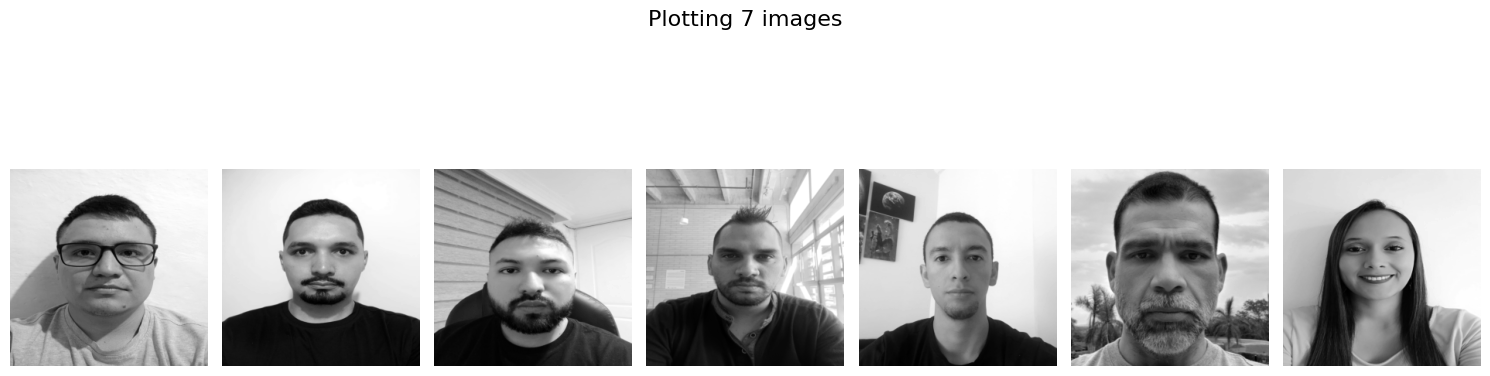

In [8]:
import sys
import os
from PIL import Image

from app.lib.utils import read_some_images, read_one_image, plotImages # see utils.py
import matplotlib.pyplot as plt

images_names = [i for i in list(os.walk('./collected_images'))[0][2] if '.txt' not in i.lower()]# collect file names in the defined folder
images_path = list(map(lambda x: './collected_images/'+x, images_names)) # add the path of the file

all_images = read_some_images(images_path)
plotImages(all_images, n_images = 7)

- Let's plot my face

Image of Jose Alcocer has been found at ./collected_images/JoseAlcocer.jpg


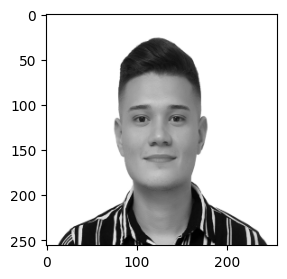

In [9]:
my_face_img_path = None
for path in images_path:
    if 'ALCOCER' in path.upper():
        my_face_img_path = path
        print(f"Image of Jose Alcocer has been found at {path}")

my_face_img = read_one_image(my_face_img_path)
plt.figure(figsize=(3,3))
plt.imshow(my_face_img, cmap = 'gray')
plt.show()

- Calculate and plot the average face of the cohort

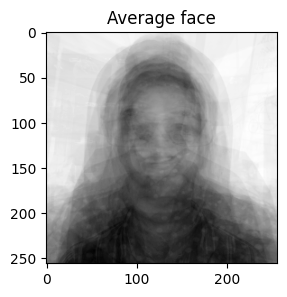

In [10]:
plt.figure(figsize=(3,3))
avg_face = np.average(all_images, axis = 0)
plt.title('Average face')
plt.imshow(avg_face , cmap = 'gray')
plt.show()

- How distant is your face from the average? How would you measure it?

We can try to measure it thinking about euclidean distance, and this is the square root of sum squared of the differences between the coordinates of 2 points.

Note that euclidean distance is L2 norm, and with numpy.linal.norm, we can set this parameter with order = 2, see more in [Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [11]:
import pandas as pd

euclidean_distances = pd.DataFrame(columns=['image', 'euclidean_distance_from_avg_face']) # DataFrame to save results
for path in images_path:
    aux_img = read_one_image(path)
    ed = np.linalg.norm(aux_img.flatten() - avg_face.flatten(), ord = 2) # euclidean distance
    euclidean_distances.loc[len(euclidean_distances)] = {'image': path.replace('./collected_images/', '').split('.')[0], 'euclidean_distance_from_avg_face': round(ed, 2)}

euclidean_distances.sort_values(by = 'euclidean_distance_from_avg_face', ascending= True, inplace=True) # sorted by least distance
euclidean_distances.reset_index(drop=True, inplace = True)
euclidean_distances

,image,euclidean_distance_from_avg_face
0,JD,50.60
1,Laura,50.65
2,SantiagoRG,53.20
3,Daniel V,53.50
4,Robinson_Alvarez,53.87
5,Santiago M,55.50
6,DanielaAguiarV,56.03
7,VanessaLopera,56.61
8,JuanPabloM,56.79
9,JorgeMorales,57.05


What about me?

In [12]:
print(f"I'm in the position {euclidean_distances[euclidean_distances.image.str.contains('alcocer', case=False)].index[0]+1} of nearest faces to the avg face\
with an euclidean distance of {euclidean_distances[euclidean_distances.image.str.contains('alcocer', case=False)]['euclidean_distance_from_avg_face'].values[0]}")

I'm in the position 18 of nearest faces to the avg facewith an euclidean distance of 73.61


### **4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?**

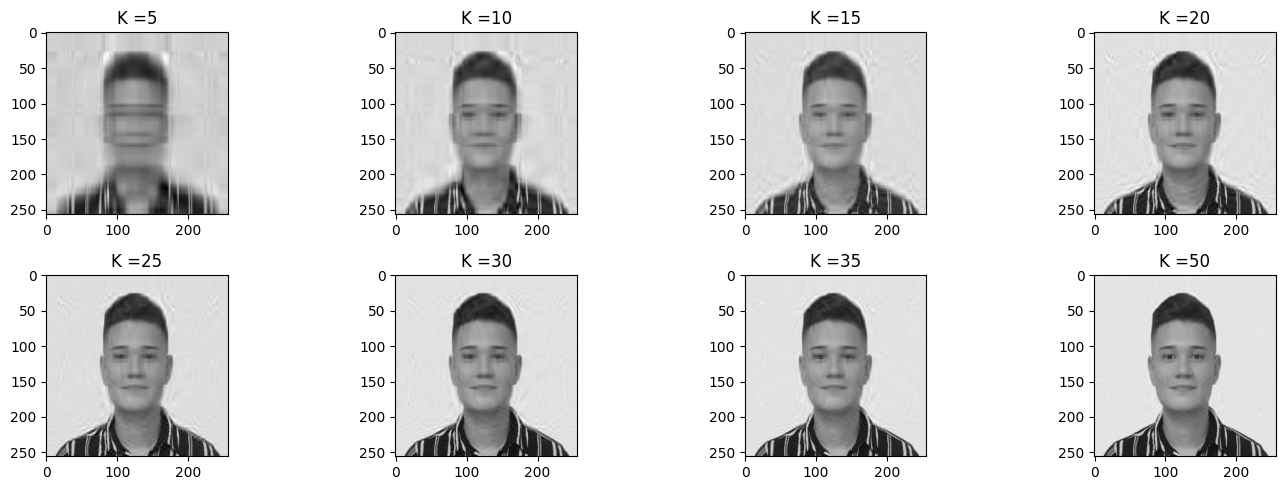

In [13]:
from app.lib.utils import svd_scratch # see utils.py

# notice that n_components is a init parameter, but it's programmed as the number of singular values

singular_values = [5, 10, 15, 20, 25, 30, 35, 50]
rows = 2
cols = 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize = (15,5))
i=0
for row in range(rows):
    for col in range(cols):
        svd = svd_scratch(n_components=singular_values[i])
        img_transformed = svd.fit_transform(my_face_img)
        axes[row,col].set_title('K ='+str(singular_values[i]))
        axes[row, col].imshow(img_transformed, cmap = 'gray')
        i += 1
    plt.tight_layout()
plt.show()


We can see with k = 50 we have a good reconstruction

S or sigma is a diagonal matrix containing the square roots of Eigenvalues and also can meausure the relative importance or the explained variance of every component. So, we can suppose an optimal number of components for compression based on this

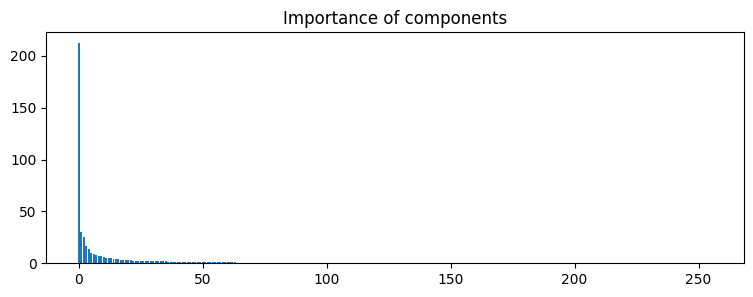

In [14]:
svd = svd_scratch() # all the components
img_transformed = svd.fit_transform(my_face_img)
s = svd.sigma # extract s 

plt.figure(figsize=(9,3))
plt.title('Importance of components')
plt.bar(np.arange(len(np.diag(s))), np.diag(s))
plt.show()

- How to measure how approximate is the compressed images from the original?

We can think about mean absolute error, and it could help us to quantify the loss. We have seen previously that the compressed image can be generated with an acceptable quality and low rank, so we expect MSE should be low or close to zero

In [15]:
from sklearn.metrics import mean_absolute_error
svd = svd_scratch(n_components=50) # all the components
img_transformed = svd.fit_transform(my_face_img)

print(f"MAE: {mean_absolute_error(my_face_img, img_transformed)}")

MAE: 0.010000949185418414


### **5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?**


In [33]:
# We already know that MNIST images come in 3 channels and 255 pixels, so we are going to standardize them, and to flatten them to pass them to the algorithms

from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# standardize between 0 and 1
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] ) / 255.0
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2] ) / 255.0


# in my case, i will sample the dataset due to the available memory i have on my machine

ids1 = np.random.randint(0,60000, (3000))
X_train_s = X_train[ids1]
y_train_s = y_train[ids1]

ids2 = np.random.randint(0,10000, (100))
X_test_s = X_test[ids2]
y_test_s = y_test[ids2]


def make_logistic_regression(X_train_, y_train_, X_test, y_test):
    lr = LogisticRegression()
    lr.fit(X_train_, y_train_)
    return round(accuracy_score(y_test, lr.predict(X_test)),2)


print(f"Logistic regression's accuracy score without dimensionality reduction with test data: {make_logistic_regression(X_train_s, y_train_s, X_test_s, y_test_s)}")

Logistic regression's accuracy score without dimensionality reduction with test data: 0.9


### **6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.**

- #### **Plot the 2 new features generated by your algorithm**

In [23]:
from app.lib.utils import PCA, tsne

# fit our t-SNE built from scratch

my_tsne = tsne(n_components=2)
my_tsne.fit(X_train_s)
X_train_TSNE = my_tsne.transform(X_train_s)
X_test_TSNE = my_tsne.fit_transform(X_test_s)

# fit our PCA built from scratch
my_pca = PCA(n_components=2)
X_train_PCA = my_pca.fit_transform(X_train_s)
X_test_PCA = my_pca.transform(X_test_s)

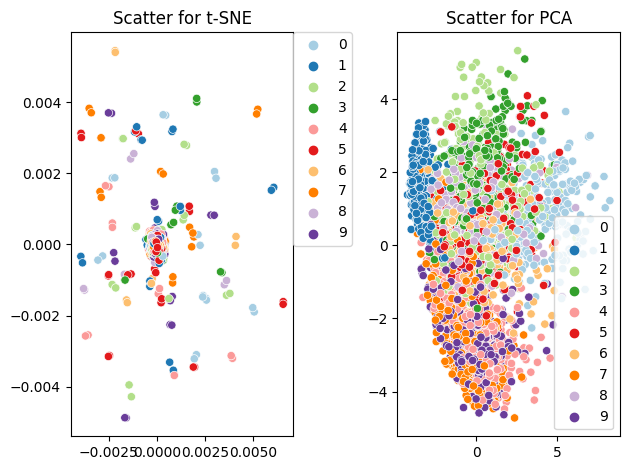

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
axes[0].set_title('Scatter for t-SNE')
sns.scatterplot(x = X_train_TSNE[:,0], y = X_train_TSNE[:,1], hue = y_train_s, ax = axes[0], palette='Paired')
axes[0].legend(bbox_to_anchor = (1,1), loc = 2, borderaxespad = 0.)
axes[1].set_title('Scatter for PCA')
sns.scatterplot(x = X_train_PCA[:,0], y = X_train_PCA[:,1], hue = y_train_s, ax = axes[1], palette='Paired')
plt.tight_layout()
plt.show()


- ####  **Does this somehow impact the performance of your model?**

In [34]:
print(f"Logistic regression's accuracy score with PCA dimensionality reduction from scratch implementation and test dataset: {make_logistic_regression(X_train_PCA, y_train_s, X_test_PCA, y_test_s)}")
print(f"Logistic regression's accuracy score with t-SNE dimensionality reduction from scratch implementation and test dataset: {make_logistic_regression(X_train_TSNE, y_train_s, X_test_TSNE, y_test_s)}")

Logistic regression's accuracy score with PCA dimensionality reduction from scratch implementation and test dataset: 0.13
Logistic regression's accuracy score with t-SNE dimensionality reduction from scratch implementation and test dataset: 0.09


We can see the accuracy score has decreased, we can think that it is due to do an aggresive compresion of the dataset, probably only 2 components are not enough to explain the dataset's variance

### **7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?**


In [29]:
from sklearn.manifold import TSNE as sktsne
from sklearn.decomposition import PCA as skpca

# fit with t-SNE from sklearn

sk_tsne = sktsne(n_components=2)
X_train_sk_tsne = sk_tsne.fit_transform(X_train_s)
X_test_sk_tsne = sk_tsne.fit_transform(X_test_s)

# fit with PCA from sklearn

sk_pca = skpca(n_components=2)
X_train_sk_pca = sk_pca.fit_transform(X_train_s)
X_test_sk_pca = sk_pca.transform(X_test_s)

print(f"Logistic regression's accuracy score with sklearn PCA dimensionality reduction: {make_logistic_regression(X_train_sk_pca, y_train_s, X_test_sk_pca, y_test_s)}")
print(f"Logistic regression's accuracy score with sklearn t-SNE dimensionality reduction: {make_logistic_regression(X_train_sk_tsne, y_train_s, X_test_sk_tsne, y_test_s)}")

Logistic regression's accuracy score with sklearn PCA dimensionality reduction: 0.42
Logistic regression's accuracy score with sklearn t-SNE dimensionality reduction: 0.08


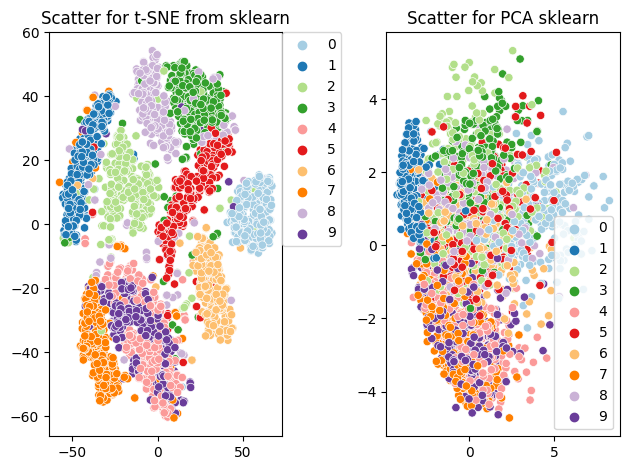

In [27]:
fig, axes = plt.subplots(1,2)
axes[0].set_title('Scatter for t-SNE from sklearn')
sns.scatterplot(x = X_train_sk_tsne[:,0], y = X_train_sk_tsne[:,1], hue = y_train_s, ax = axes[0], palette='Paired')
axes[0].legend(bbox_to_anchor = (1,1), loc = 2, borderaxespad = 0.)
axes[1].set_title('Scatter for PCA sklearn')
sns.scatterplot(x = X_train_sk_pca[:,0], y = X_train_sk_pca[:,1], hue = y_train_s, ax = axes[1], palette='Paired')
plt.tight_layout()
plt.show()

The results are very similar, we have:

| Method | n_components | Accuracy from scratch | Accuracy with scikit-learn |
|--------|--------------|-----------------------|----------------------------|
| t-SNE  | 2            | 0.1                   | 0.08                       |
| PCA    | 2            | 0.42                  | 0.42                       |

The results are likely the same and it is due to the implementation, we can see the implementation from scratch has a similar output to the output from sklearn methods. We can see the plots for PCA are the same, but for t-SNE varies, and it is due to t-SNE from scratch is creating clusters closer to each other and it's an error that should be fixed

#### Are we taking the appropiate number of components for PCA?

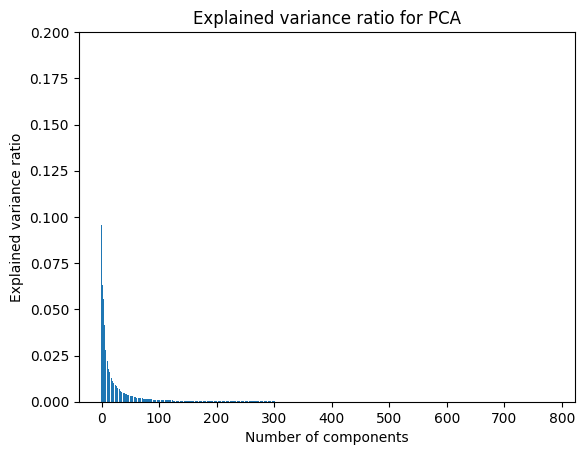

In [21]:
# apply PCA with whole components to obtain explained variance ratio
sk_pca = skpca(n_components=X_train_s.shape[1])
sk_pca.fit(X_train_s)

# explained variance ratio from each component for PCA
variance_ratio_pca = sk_pca.explained_variance_ratio_

# plot PCA explained variance ratio
plt.title('Explained variance ratio for PCA')
plt.bar(np.arange(len(variance_ratio_pca)), variance_ratio_pca)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.ylim(0, .2)
plt.show()

In [22]:
print(f"We need 150 components in PCA to obtain a {variance_ratio_pca[:150].sum(axis = 0):.2%} of explained variance ratio")

We need 150 components in PCA to obtain a 95.20% of explained variance ratio


### **8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)**


- *What's the problem with PCA?*

The problem with PCA is that lacks of sparsity and outliers, so much noise and corrupt values will skew the distribution of PCA, so we conclude PCA is so sensitive to noise or outliers

- *How can we solve it or make ir more robust?*

If the problems are noisy data, bad measurements or outliers, ***we can penalize them with L1 norm***. Recall that L1 norm penalizes the sum of the absolute values and L2 norm penalizes the sum of the squares of the errors (which will be so much larger in outliers), so with L1 we give heavier weights to outliers but with L2 the components will be weighted equally

###  **9. What are the underlying mathematical principles behind UMAP? What is it useful for?**

It works similar to t-SNE based on neighbor concept but is faster than t-SNE and tends to better preserve the global structure of the data, both use graph layout algorithms to arrange data in low-dimensional space. In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible ***transforming distances into similarity scores.***

So first we math a probability density function in the high-dimensional space and find the nearest neighbors with an optimization algorithm as SGD to minimize distance between between points of low-dimensional space and high (nearby points in high-dimensional space have a high probability to be neighbors in low-dimensional space than those that are not) and to math these distances we use similarity scores preserving the topologic structure.

The effect that perplexity parameter has in in t-SNE is very similar to the number of high-dimensional neighbors that we set un UMAP.

It's an non-linear algorithm for dimensionality reduction it's useful for reduce dimensionality in large datasets because is faster than t-SNE and to analize topological data

###  **10. What are the underlying mathematical principles behind LDA? What is it useful for?**


Linear discriminant analysis can be used for both classification problems with more than 2 classes or dimensionality reduction for problems with more than 2 classes. In the first case will predict the classes by calculating the conditional probability of the sample belonging to each class and selecting the class with the highest probability. For the second case, it will project data to maximize class separation and can be even used as feature engineering technique.

- How it works?

Basically reduces dimensionality but it's focused on maximize the separability between classes and minimize the variance within the individual classes, and this can be done creating a new axis maximizing the distance between means of classes and minimizing the variance within each class

When it's used as model for multi classification problem the algorithm involves developing a probabilistic model per class based on the specific distribution of observations for each input variable. A new example is then classified by calculating the conditional probability of it belonging to each class and selecting the class with the highest probability.